# Tensor Flow Example - Modified for Ancient Greek

The code for this example was taken from
https://keras.io/examples/vision/mnist_convnet/

It uses a convolution neural network to train the model.  I also added a few things to help with visualization of the results.

-John Wallin, MTSU

In [20]:
# You may need to uncomment the following lines if you aren't running this notebook on Google Colab
# and they aren't installed yet.
!pip install tensorflow
!pip install matplotlib
!pip install matplotlib
!pip install seaborn

In [21]:
# clone the github repository with the images
!git clone https://github.com/jfwallin/AI-ML-demos.git

fatal: destination path 'AI-ML-demos' already exists and is not an empty directory.


In [22]:
# uncomment if you have problems with your library in colab

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os


In [23]:
# The code was taken and then modified from the source above to handel user images.

num_images = 500
epochs = 10
batch_size = 128

# Model / data parameters
num_classes = 3
input_shape = (70, 70, 1)
image_size = (70, 70)
image_folder = "/content/AI-ML-demos/images"


# Load images from the directory
def load_images_from_folder(folder, image_size, num_images):
    images = []
    labels = []
    class_names = os.listdir(folder)
    for class_name in class_names:
        class_folder = os.path.join(folder, class_name)
        if os.path.isdir(class_folder):
            image_files = os.listdir(class_folder)[:num_images]
            for image_file in image_files:
                image_path = os.path.join(class_folder, image_file)
                image = keras.preprocessing.image.load_img(image_path, target_size=image_size, color_mode='grayscale')
                image = keras.preprocessing.image.img_to_array(image)
                images.append(image)
                labels.append(class_name)
    return np.array(images), np.array(labels), class_names

# Load images and labels
images, labels, class_names = load_images_from_folder(image_folder, image_size, num_images)

# Encode labels to integers
label_to_index = {label: idx for idx, label in enumerate(np.unique(labels))}
labels = np.array([label_to_index[label] for label in labels])

# Convert labels to categorical
labels = keras.utils.to_categorical(labels, num_classes)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Print shapes
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
print("class names:", class_names)

x_train shape: (1200, 70, 70, 1)
1200 train samples
300 test samples
class names: ['Nu', 'Alpha', 'Delta']


In [24]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 68, 68, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 34, 34, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │          49,155 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,971 (265.51 KB)

 Trainable params: 67,971 (265.51 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Now that our model is defined and our data set if prepped, we can train the model.



model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.3377 - loss: 45.5183 - val_accuracy: 0.4667 - val_loss: 3.0969
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 849ms/step - accuracy: 0.4410 - loss: 3.3850 - val_accuracy: 0.7167 - val_loss: 0.7655
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 945ms/step - accuracy: 0.7022 - loss: 0.7200 - val_accuracy: 0.7083 - val_loss: 0.6725
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 715ms/step - accuracy: 0.7369 - loss: 0.6611 - val_accuracy: 0.7417 - val_loss: 0.6074
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 906ms/step - accuracy: 0.7843 - loss: 0.5630 - val_accuracy: 0.7917 - val_loss: 0.5920
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 714ms/step - accuracy: 0.8073 - loss: 0.4882 - val_accuracy: 0.7917 - val_loss: 0.5373
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 937ms/step - accuracy: 0.8319 - loss: 0.4389 - val_accuracy: 0.8167 - val_loss: 0.5373
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8548 - loss: 0.4120 - val_accuracy: 0.8250 - val_loss: 

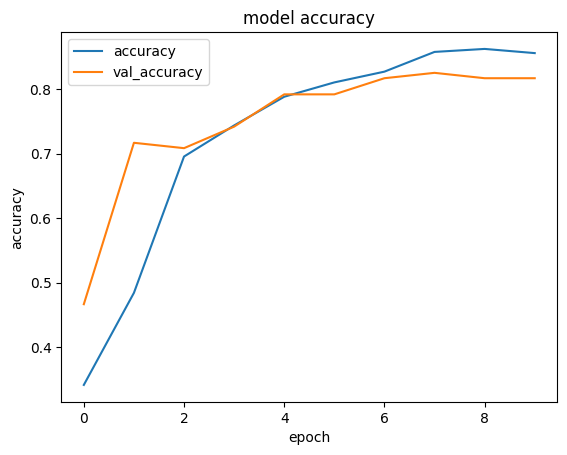

Text(0.5, 1.0, 'Model Loss')

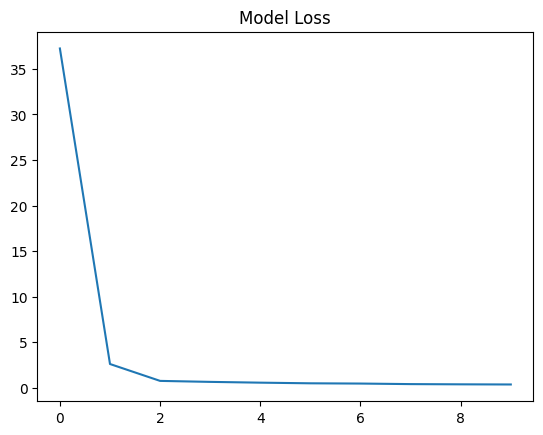

In [26]:

# we will plot accuracy and validation accuracy

plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

# Model Loss
plt.plot(history.history['loss'])
plt.title("Model Loss")

In [27]:
# this is a good way to evaluate the model - look at the test loss and test accuracy

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.5608721971511841
Test accuracy: 0.8033333420753479


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
Predicted:  1 Actual:  1
Category  :      0            1            2       
Classnames  :       Nu      Alpha      Delta   
Predicted :  1.124e-01     7.369e-01     1.506e-01    
Actual    :  0.000e+00     1.000e+00     0.000e+00    

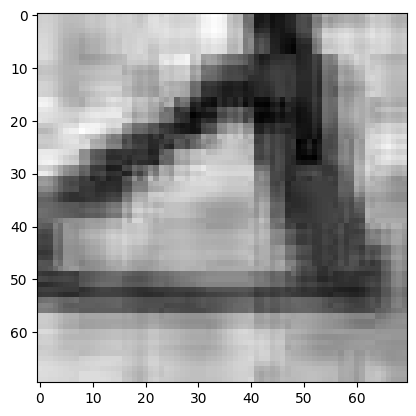

In [28]:
# we can examine each character to see what the predictions
# and compare it with the actual value and the image.
# For the most part, the predictions and the actual values
# agree.  However, the disagreements are interesting.
# We typically have two types of disagreements.
# 1) the model is wrong because the image is ambiguous.
# 2) the model is wrong because the image is mislabeled.



i= 40
img = x_test[i].reshape(70,70,)
plt.imshow(img, cmap='gray')

xx = model.predict(x_test)
print("Predicted: ", np.argmax(xx[i]), "Actual: ", np.argmax(y_test[i]))


# this block of code prints out the probabilities for each category
# instead of just the simple prediction.  It shows when things
# are ambiguous according to the model instead of just taking the
# top prediction.

print("Category  : ", end="")
for k in range(num_classes):
    print("     %1.1i     " % k, end="  ")
print()

print("Classnames  : ", end="")
for k in range(num_classes):
    print("%8.8s " % class_names[k], end="  ")
print()

print("Predicted : ", end="")
for k in range(num_classes):
    print(" %5.3e  " % xx[i][k], end="  ")
print()

print("Actual    : ", end="")
for k in range(num_classes):
    print(" %5.3e  " % y_test[i][k], end="  ")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


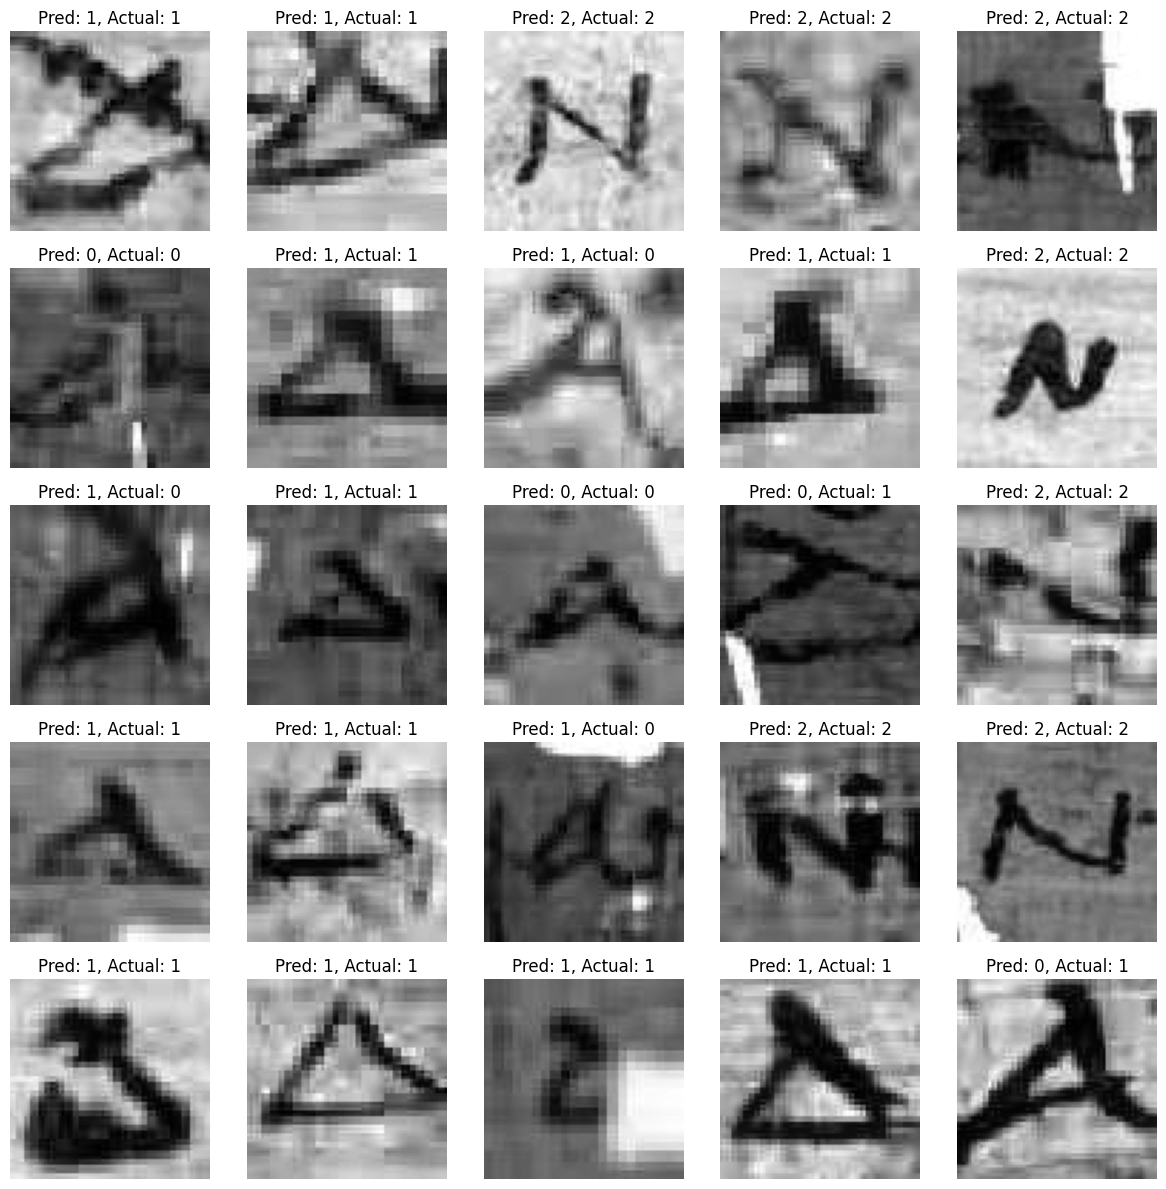

In [35]:
# prompt:  prints out an array of images, with the predicted and actual values. put this into an array of 5 x 5 images.  use the category numbers

import matplotlib.pyplot as plt
import numpy as np

# Assuming you have x_test, y_test, model, and class_names defined as in your original code

num_rows = 5
num_cols = 5
num_images = num_rows * num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

for i in range(num_images):
  row = i // num_cols
  col = i % num_cols

  img = x_test[i].reshape(70, 70)
  axes[row, col].imshow(img, cmap='gray')
  axes[row, col].axis('off')

  xx = model.predict(x_test)
  predicted_label = np.argmax(xx[i])
  actual_label = np.argmax(y_test[i])
  axes[row, col].set_title(f"Pred: {predicted_label}, Actual: {actual_label}")


plt.tight_layout()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


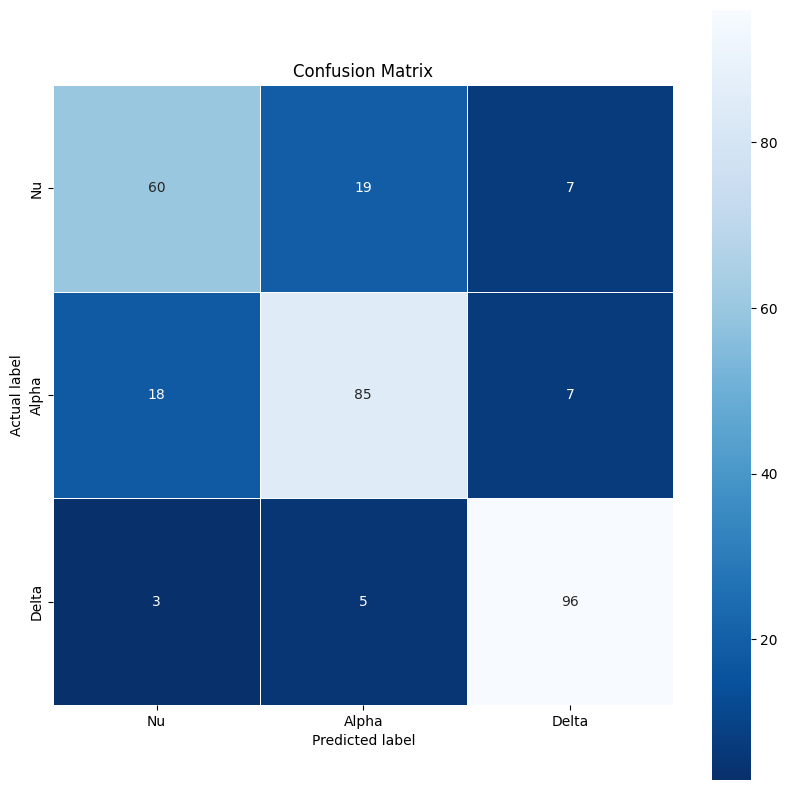

In [38]:
# create a confusion matrix for the test set
# confusion matrix is a table that is often used to describe the performance of a classification model

def confusion_matrix(y_true, y_pred):
    y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    n = np.unique(y_true).shape[0]
    cm = np.zeros((n, n))
    for i in range(len(y_true)):
        cm[y_true[i], y_pred[i]] += 1
    return cm

y_true = y_test
y_pred = model.predict(x_test)

die = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(die, annot=True, fmt=".0f", linewidths=0.5, square=True, cmap='Blues_r', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


In [32]:

die = confusion_matrix(y_true, y_pred)

for i in range(num_classes):
    # diagnol value
    correct = die[i, i]

    # total value for row
    total = sum(die[i, :])

    # accuracy for row
    accuracy = correct / total

    # precision for row
    precision = die[i, i] / sum(die[:, i])

    # recall for row
    recall = die[i, i] / sum(die[i, :])

    # f1 score for row
    f1 = 2 * precision * recall / (precision + recall)

    # confusion matrix for this digit from the precision, recall, accuracy, and f1 score for each digit
    print('\nResults for class %s:\n   Precision=%.2f, Recall=%.2f, Accuracy=%.2f, F1=%.2f' % (class_names[i], precision, recall, accuracy, f1))




Results for class Nu:
   Precision=0.74, Recall=0.70, Accuracy=0.70, F1=0.72

Results for class Alpha:
   Precision=0.78, Recall=0.77, Accuracy=0.77, F1=0.78

Results for class Delta:
   Precision=0.87, Recall=0.92, Accuracy=0.92, F1=0.90
